# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [24]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [25]:
"""
Calculate:
p = probability that the fruit is an apple    60/100
q = probability that the fruit is an orange  40/100
"""
fruits = 100
apples = 60
oranges = 40

p_apple = apples / fruits  # Probability of "success" (apple)
p_orange = 1 - p_apple     # Probability of "failure" (orange)

print(f"Probability that the fruit is an apple: {p_apple:.2f} ({p_apple*100:.2f}%)")
print(f"Probability that the fruit is an orange: {p_orange:.2f} ({p_orange*100:.2f}%)")

Probability that the fruit is an apple: 0.60 (60.00%)
Probability that the fruit is an orange: 0.40 (40.00%)


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

2. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [26]:
# What is the probability that the first 5 fruits are all apples?
sample = 20 # fruits from the basket
# Why This Works: Replacement ensures p and q stay constant.

# 1. Probability that the first 5 fruits are all apples
prob_first_5_apples = p_apple ** 5

# 2. Probability that first 5 are apples AND next 15 are oranges
prob_next_15_oranges = p_orange ** 15
prob_sequence = prob_first_5_apples * prob_next_15_oranges


# Print results
print("1. Probability that the first 5 fruits are all apples:")
print(f"   Result: {prob_first_5_apples:.8f} ({prob_first_5_apples:.8%})\n")

print("2. Probability that the first 5 are apples and the next 15 are oranges:")
print(f"   Result: {prob_sequence:.15f} ({prob_sequence:.15%})")

1. Probability that the first 5 fruits are all apples:
   Result: 0.07776000 (7.77600000%)

2. Probability that the first 5 are apples and the next 15 are oranges:
   Result: 0.000000083494164 (0.000008349416423%)


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [27]:
# your solution here
n = sample = 20 # fruits (total trials)
k_apples = 5 
k_oranges = 15 

p_success = p_apple # apples p: Probability of success (apple).
p_failure = p_orange    # 1−p: Probability of failure (orange)

# Probability of exactly 5 apples (and thus 15 oranges)
prob_5_apples = stats.binom.pmf(k_apples, n, p_apple)

print(f"Probability of exactly 5 apples and 15 oranges: {prob_5_apples:.10f}")



Probability of exactly 5 apples and 15 oranges: 0.0012944935


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [28]:
# your code here

n = 20          # Total trials
k_apples = 5    # Apples threshold
p_apple = 0.6   # Probability of picking an apple

# For "LESS THAN 5" apples (0–4):
prob_less_than_5 = stats.binom.cdf(k_apples-1, n, p_apple)
print(f"Probability of fewer than 5 apples: {prob_less_than_5:.10f}")

# For "UP TO 5" apples (0–5):
prob_upto_5 = stats.binom.cdf(k_apples, n, p_apple)
print(f"Probability of 5 or fewer apples: {prob_upto_5:.10f}")

Probability of fewer than 5 apples: 0.0003170311
Probability of 5 or fewer apples: 0.0016115246


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

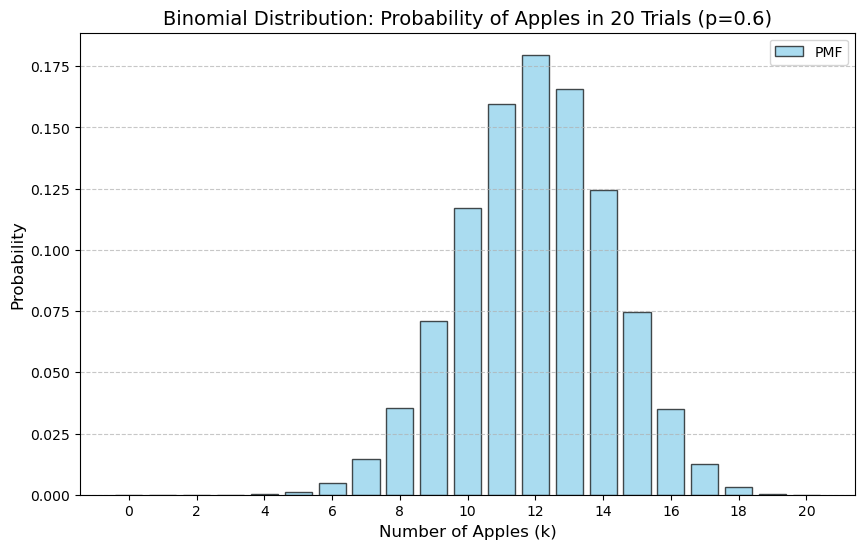

In [36]:
# your code here
# Please label the axes and give a title to the plot 

# Parameters
n = 20          # Total trials (fruits picked)
p_apple = 0.6   # Probability of picking an apple

# Generate all possible k_values (0 to 20 apples)
k_values = np.arange(0, n + 1)

# Compute binomial probabilities for ALL k_values
probabilities = stats.binom.pmf(k_values, n, p_apple)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities, color='skyblue', edgecolor='black', alpha=0.7, label='PMF')
plt.title('Binomial Distribution: Probability of Apples in 20 Trials (p=0.6)', fontsize=14)
plt.xlabel('Number of Apples (k)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(k_values[::2])  # Show every 2nd tick to reduce clutter
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [40]:
import math
# the average number of goals scored in a match is 2.3. 
mu = mean_goals = 2.3
# Probability of <= 5 events when mean is 2.3
prob_events = 5

probability_s = stats.poisson.pmf(prob_events, mu)

print(f"Probability of exactly 5 goals: {probability_s:.4f} ({probability_s*100:.2f}%)")

# your code here 

Probability of exactly 5 goals: 0.0538 (5.38%)


In [41]:
mu = 2.3  # Average goals per match
k = 5     # Exact number of goals to calculate
# Compute the Poisson probability manually
numerator = (math.pow(mu, k)) * math.exp(-mu)
denominator = math.factorial(k)
probability_m = numerator / denominator

print(f"Probability of exactly 5 goals: {probability_m:.4f} ({probability_m*100:.2f}%)")


Probability of exactly 5 goals: 0.0538 (5.38%)


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

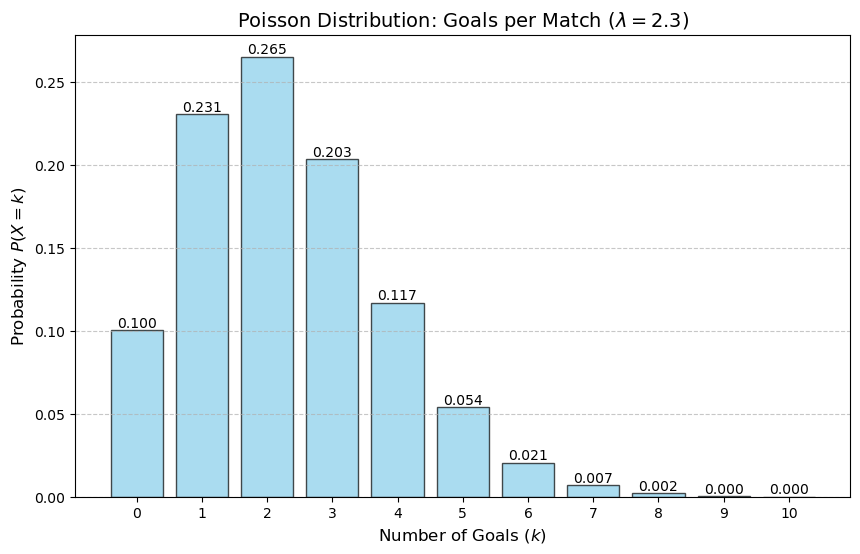

In [42]:
# your code here
# Please label the axes and give a title to the plot 

k_values = list(range(0, 11))  # Goals from 0 to 10

probabilities_s = stats.poisson.pmf(k_values, mu)

# Plot the distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(k_values, probabilities_s, color="skyblue", edgecolor="black", alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{height:.3f}', ha='center', va='bottom')

# Formatting
plt.title("Poisson Distribution: Goals per Match ($\lambda=2.3$)", fontsize=14)
plt.xlabel("Number of Goals ($k$)", fontsize=12)
plt.ylabel("Probability $P(X=k)$", fontsize=12)
plt.xticks(k_values)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()